### APS1070 Project 1 --- Basic Principles and Models
**Deadline: May 24th, 11PM - 10 percent**

**Academic Integrity**

This project is individual - it is to be completed on your own. If you have questions, please post your query in the APS1070 Piazza Q&A forums (the answer might be useful to others!).

Do not share your code with others, or post your work online. Do not submit code that you have not written yourself. Students suspected of plagiarism on a project, midterm or exam will be referred to the department for formal discipline for breaches of the Student Code of Conduct.

Name: Bader Al-Hilawani

Student ID: 1009724498

##**Marking Scheme:**

This project is worth **10 percent** of your final grade.

Draw a plot or table where necessary to summarize your findings.

**Practice Vectorized coding**: If you need to write a loop in your solution, think about how you can implement the same functionality with vectorized operations. Try to avoid loops as much as possible (in some cases, loops are inevitable).




### How to submit **(HTML + IPYNB)**

1. Download your notebook: `File -> Download .ipynb`

2. Click on the Files icon on the far left menu of Colab

3. Select & upload your `.ipynb` file you just downloaded, and then obtain its path (right click) (you might need to hit the Refresh button before your file shows up)


4. execute the following in a Colab cell:
```
%%shell
jupyter nbconvert --to html /PATH/TO/YOUR/NOTEBOOKFILE.ipynb
```

5. An HTML version of your notebook will appear in the files, so you can download it.

6. Submit **both** <font color='red'>`HTML` and `IPYNB`</font>  files on Quercus for grading.



Ref: https://stackoverflow.com/a/64487858



# Project 1 [10 Marks]
Let's apply the tools we have learned in the tutorial to a new dataset.

We're going to work with the [graduate admissions dataset](https://www.kaggle.com/datasets/mohansacharya/graduate-admissions). The dataset lists estimates of the chance of admission determined by several important parameters for a number of graduate school admissions decisions.


Download it using the cells below:

In [50]:
pip install wget

In [51]:
import wget

wget.download('https://raw.githubusercontent.com/Sabaae/Dataset/master/Admission_predict.csv')

'Admission_predict (1).csv'

## Part 1: Getting started [2.5 Marks]
First off, load the dataset in CSV file using Pandas and name it `df`. The dataset is called `Admission_predict.csv`. Reset the indices list of the DataFrame, and delete the `Serial No.` column. Print out the first few rows of the dataset, and take a look at the features data and the target columns. **[0.4]**

* How many features do we have in this dataset? 7
* Determine the median target value. 0.72
* How many individuals have a target value greater than the median target value? 248


Now add an additional column containing either 0 (if the target value is below the median) or 1 (if the target value is above the median). This will be the new target value to classify the data as the individuals with a chance of admission below median or the individuals with a chance of admission above median. **[0.5]**

In [52]:
import pandas as pd #import pandas library

df = pd.read_csv('Admission_predict.csv') #named the CSV data file to Admission_predict.csv

df.reset_index()#reset the indicies

df = df.drop('Serial No.', axis=1)#dropped the "Serial No." column.

df.head()#print out the first 5 rows of the data set.

df.iloc[0, : -1].count()#The number of features minus the target.

df['target'].median()#Calculates for the median in the target column. (0.72)

df[df['target'] > df['target'].median()].iloc[:,0].count()#chain the indexing operations to only look at targets whose value is larger than the median.
                                                          #Then using the iloc function, I selected any coloumn and all rows and used the function count to the number of rows to get the total number of targets that are > median target.

df['New_Target_Value'] = (df['target'] > df['target'].median()).astype(int)#adds a new column to the df data set and the values for that column are a boolean in that if the target values are greater than the median target it outputs True, otherwise, False.
                                                                          #The astype function was used to convert the True and False to 1's and 0's

#greater than is 248, less than is 236, therefore there are 16 targets who are equal to the median. Based on the question asked in piazza regarding this we can do either > or >=. I chose to do > which outputs a slightly different result compared to >=

#df displays the updated df data set with the new column added.
print(df)



     GRE Score  TOEFL Score  University Rating  SOP  LOR  CGPA  Research  \
0          337          118                  4  4.5  4.5  9.65         1   
1          324          107                  4  4.0  4.5  8.87         1   
2          316          104                  3  3.0  3.5  8.00         1   
3          322          110                  3  3.5  2.5  8.67         1   
4          314          103                  2  2.0  3.0  8.21         0   
..         ...          ...                ...  ...  ...   ...       ...   
495        332          108                  5  4.5  4.0  9.02         1   
496        337          117                  5  5.0  5.0  9.87         1   
497        330          120                  5  4.5  5.0  9.56         1   
498        312          103                  4  4.0  5.0  8.43         0   
499        327          113                  4  4.5  4.5  9.04         0   

     target  New_Target_Value  
0      0.92                 1  
1      0.76            

### Splitting the data
It is best practice to have a training set (from which there is a rotating validation subset) and a test set. Our aim here is to (eventually) obtain the best accuracy we can on the test set (we'll do all our tuning on the training/validation sets, however.)

**Split the dataset** into a train and a test set **"70:30"**, use **``random_state=xx``** where ``xx`` is the last two digits of your student number. The test set is set aside (untouched) for final evaluation, once hyperparameter optimization is complete. **[0.5]**

**Only Split the dataset once within you notebook.** You should not use the `train_test_split` function more than once, regardless of the random state. Keep this in mind for your future projects as well.

In [53]:
feature_data = df.iloc[0 : , 0 : 7] #variable feature_data is defined in that its a dataframe which considers only the rows and cols associated with the features
target_data = df.iloc[0 : , -1 :] #variable target_data is defined in that its a series of data which only considers the rows and col of the new target data

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(feature_data, target_data, test_size=0.3, random_state=98)

print(X_train)

     GRE Score  TOEFL Score  University Rating  SOP  LOR  CGPA  Research
61         307          101                  3  4.0  3.0  8.20         0
12         328          112                  4  4.0  4.5  9.10         1
225        296           99                  2  2.5  2.5  8.03         0
99         323          113                  3  4.0  4.0  8.88         1
160        315          103                  1  1.5  2.0  7.86         0
..         ...          ...                ...  ...  ...   ...       ...
91         299           97                  3  5.0  3.5  7.66         0
447        320          108                  3  3.5  5.0  8.97         1
180        300          104                  3  3.5  3.0  8.16         0
42         313          107                  2  2.5  2.0  8.50         1
474        308          105                  4  3.0  2.5  7.95         1

[350 rows x 7 columns]


### Effect of Standardization (Visual)
Use `seaborn.lmplot` ([help here](https://seaborn.pydata.org/generated/seaborn.lmplot.html)) to visualize a few features of the training set. Draw a plot where the x-axis is the `GRE Score`, and the y-axis is the `CGPA`, and the color of each datapoint indicates its class.  **[0.5]**

Standardizing the data is often critical in machine learning. Show a plot as above, but standardize the two features. What's different? **why do they look similar?** Based on your observation, what is the advantage of standardization? **[0.6]**




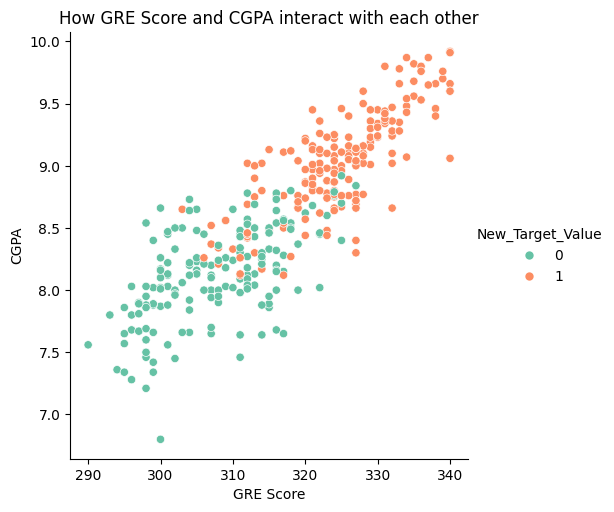

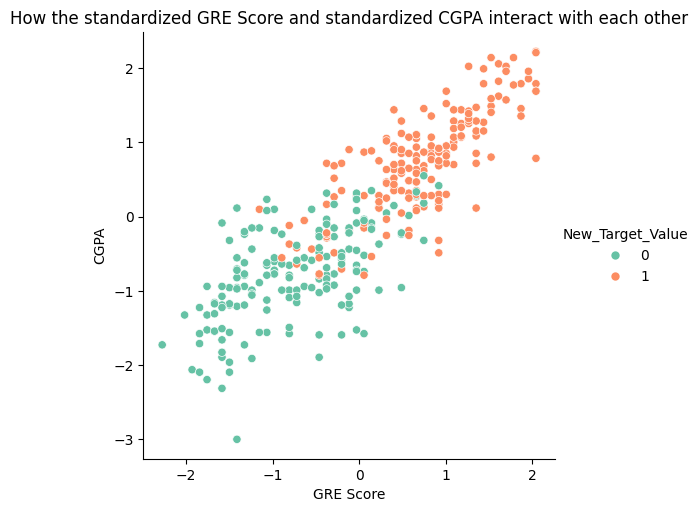

In [54]:
import seaborn as sns #import seaborn to plot


Training_Data_X_train = pd.DataFrame(X_train) #set the X_train to dataframe
Training_Data_y_train = pd.DataFrame(y_train) #set the y_train to dataframe

X_y_training_set = pd.concat([Training_Data_X_train, Training_Data_y_train], axis = 1)


with sns.color_palette("Set2"): #color of the plot
  sns.relplot(data = X_y_training_set, x = "GRE Score", y = "CGPA", hue = 'New_Target_Value').set(title="How GRE Score and CGPA interact with each other") #plot the 2 features


X_y_training_set_GRE_Score_mean = X_y_training_set['GRE Score'].mean() #calculate the mean for the GRE score
X_y_training_set_GRE_Score_std = X_y_training_set['GRE Score'].std() #calculate the std for the GRE score

X_y_training_set_CGPA_mean = X_y_training_set['CGPA'].mean() #calculate the mean for the CGPA
X_y_training_set_CGPA_std = X_y_training_set['CGPA'].std() #calculate the std for the CGPA


X_y_training_set['GRE Score'] = (X_y_training_set['GRE Score'] - X_y_training_set_GRE_Score_mean) / X_y_training_set_GRE_Score_std #change the value of GRE score to standardize it

X_y_training_set['CGPA'] = (X_y_training_set['CGPA'] - X_y_training_set_CGPA_mean) / X_y_training_set_CGPA_std #change the value of CGPA score to standardize it


with sns.color_palette("Set2"): #color plot
  sns.relplot(data = X_y_training_set, x = "GRE Score", y = "CGPA", hue = 'New_Target_Value').set(title="How the standardized GRE Score and standardized CGPA interact with each other")#plot the 2 features that are standardized



Standardizing the data is often critical in machine learning. Show a plot as above, but standardize the two features. What's different? why do they look similar? Based on your observation, what is the advantage of standardization? [0.6]

Answer:

After standardizing the data, there was no difference compared to the original plot other than the scale changing. Both graphs look the same suggests that the New Target Value was already scaled similarly across the GRE Score and CGPA before standardization. The advantages of standardizing is that it allows all the features to be represented on the same scale therefore, features with larger scale will not dominate the analysis. It also removes the impact of the outliers that are within the data set.

## Part 2: KNN Classifier without Standardization [2 Marks]
Normally, standardizing data is a key step in preparing data for a KNN classifier. However, for educational purposes, let's first try to build a model without standardization. Let's create a KNN classifier to predict whether an individual has a chance of admission that is less than the median or greater than the median.

Follow these steps:

1.   Train a KNN Classifier using cross-validation on the dataset. Sweep `k` (number of neighbours) from 1 to 100, and show a plot of the mean cross-validation accuracy vs `k`. **[1]**
2.   What is the best `k`? What is the highest cross-validation accuracy? **[0.5]**
3. Comment on  which ranges of `k` lead to underfitted or overfitted models (hint: compare training and validation curves!). **[0.5]**



In [55]:
from sklearn.model_selection import cross_validate #import cross validation
from sklearn import neighbors # import neighbors
import numpy as np #import numpy library

y_train = np.array(y_train).ravel() #flatten's the data from a coloumn vector (2D array) to a 1D array since the KNN expects the shape to be a 1D array. This removed the warning label the comes up.


all_the_cross_validation_accuracy = [] #holds all the values of the mean cross validation accuracy into a list
all_the_cross_mean_train_accuracy = [] #hold all the vallues fo the mean train accuracy into a list

for k in range(1, 101): #for loop that runs from k = 1 to 100.

  knn = neighbors.KNeighborsClassifier(n_neighbors=k)
  scores = cross_validate(knn, X_train, y_train, cv=5, return_train_score=True)

  all_the_cross_validation_accuracy.append(scores['test_score'].mean()) #stores the value of the mean cross validation accuracy in the list and appends it.
  all_the_cross_mean_train_accuracy.append(scores['train_score'].mean()) #stores the value of the mean train cross validation accuracy in the list and appends it.

  print('Mean Train Accuracy for k = %d: %.8f' % (k, scores['test_score'].mean())) # returns the mean cross-validation train score


print('The max mean cross validation is %.10f and the k = %d:' % (max(all_the_cross_validation_accuracy), all_the_cross_validation_accuracy.index(max(all_the_cross_validation_accuracy)) + 1)) #prints the maximum cross validation accuracy and corresponding k value.

print(X_train)



Mean Train Accuracy for k = 1: 0.82857143
Mean Train Accuracy for k = 2: 0.82285714
Mean Train Accuracy for k = 3: 0.82857143
Mean Train Accuracy for k = 4: 0.81428571
Mean Train Accuracy for k = 5: 0.83428571
Mean Train Accuracy for k = 6: 0.82571429
Mean Train Accuracy for k = 7: 0.83428571
Mean Train Accuracy for k = 8: 0.83428571
Mean Train Accuracy for k = 9: 0.83428571
Mean Train Accuracy for k = 10: 0.83428571
Mean Train Accuracy for k = 11: 0.84285714
Mean Train Accuracy for k = 12: 0.84000000
Mean Train Accuracy for k = 13: 0.84000000
Mean Train Accuracy for k = 14: 0.83714286
Mean Train Accuracy for k = 15: 0.83714286
Mean Train Accuracy for k = 16: 0.83714286
Mean Train Accuracy for k = 17: 0.84285714
Mean Train Accuracy for k = 18: 0.84285714
Mean Train Accuracy for k = 19: 0.84857143
Mean Train Accuracy for k = 20: 0.84571429
Mean Train Accuracy for k = 21: 0.84285714
Mean Train Accuracy for k = 22: 0.84285714
Mean Train Accuracy for k = 23: 0.84285714
Mean Train Accuracy 

The max mean cross validation is 0.8628571429 and the k = 67:


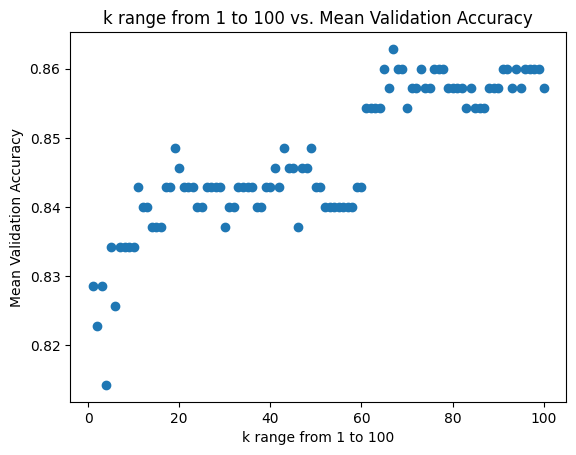

In [56]:
import matplotlib.pyplot as plt #import matplot library

plt.scatter(range(1, 101), all_the_cross_validation_accuracy) #plots the ranges of k from 1 to 100 on the x-axis and the mean cross validation with respect to each k value on the y-axis.
print('The max mean cross validation is %.10f and the k = %d:' % (max(all_the_cross_validation_accuracy), all_the_cross_validation_accuracy.index(max(all_the_cross_validation_accuracy)) + 1)) #prints the max mean corss validation accuracy with respect to its k value.

plt.xlabel("k range from 1 to 100")
plt.ylabel("Mean Validation Accuracy")
plt.title("k range from 1 to 100 vs. Mean Validation Accuracy");

plt.show()#display plot



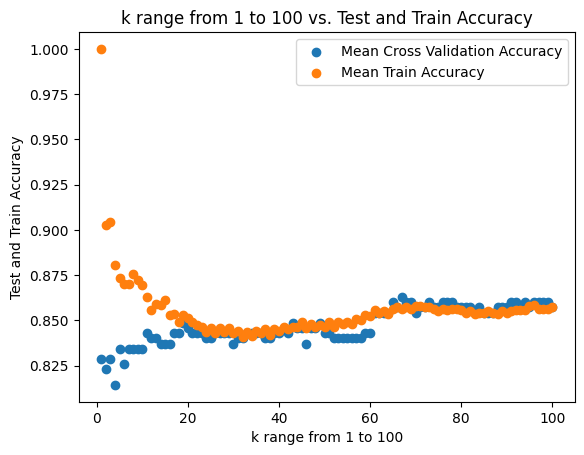

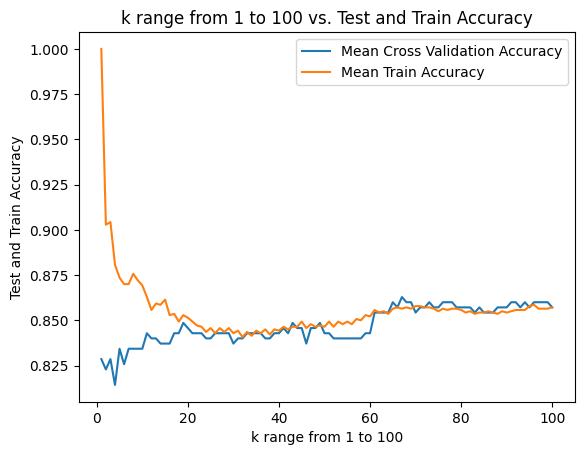

In [57]:
#max_acc = max(all_the_cross_validation_accuracy)
#best_k = all_the_cross_validation_accuracy.index(max(all_the_cross_validation_accuracy))

plt.scatter(range(1, 101), all_the_cross_validation_accuracy, label = 'Mean Cross Validation Accuracy') #plots the ranges of k from 1 to 100 on the x-axis and the mean cross validation with respect to each k value on the y-axis.
plt.scatter(range(1, 101), all_the_cross_mean_train_accuracy, label = 'Mean Train Accuracy')#plots the ranges k from 1 to 100 on the x-axis and the mean training accuracy with respect to each k value on the y-axis.
#plt.scatter(best_k, max_acc, color='red', zorder=5)
plt.legend()
plt.xlabel("k range from 1 to 100")
plt.ylabel("Test and Train Accuracy")
plt.title("k range from 1 to 100 vs. Test and Train Accuracy");
plt.show()#display plot for scatter


plt.plot(range(1, 101), all_the_cross_validation_accuracy, label = 'Mean Cross Validation Accuracy') #plots the ranges of k from 1 to 100 on the x-axis and the mean cross validation with respect to each k value on the y-axis.
plt.plot(range(1, 101), all_the_cross_mean_train_accuracy, label = 'Mean Train Accuracy')#plots the ranges k from 1 to 100 on the x-axis and the mean training accuracy with respect to each k value on the y-axis.
plt.legend()
plt.xlabel("k range from 1 to 100")
plt.ylabel("Test and Train Accuracy")
plt.title("k range from 1 to 100 vs. Test and Train Accuracy");
plt.show()#display regular plot

Based on comparing the training and validation curves, the k values that are overfitted range from k = 1 to 15 as the distance is large between the training and validation curve. This indicates high variance as the model is too sensitive to the training data. For k that range between 15 to 40 the training and validation accuracy imporve (well fitted = good balance between bias and variance) as the distance become less however, it does not reach the highest validation accuracy. From k between 40 to 70 the k range still stay within the well fitted range with k = 67 being the best as it provides the highest mean cross validation accuracy. The k ranges from 70 to 100 the training accurany is low which leads to underfitting. This is due to the model being too simple and the small gap between training and validation accuracies means high bias low variance.  

## Part 3: Feature Selection [3 Marks]
In this part, we aim to investigate the importance of each feature on the final classification accuracy.
If we want to try every possible combination of features, we would have to test  $2^F$ different cases,  where F is the number of features, and in each case, we have to do a hyperparameter search (finding K, in KNN using cross-validation). That will take days!.

To find more important features we will use a decision tree. based on a decision tree we can compute feature importance that is a metric for our feature selection (code is provided below).

You can use [this link](https://machinelearningmastery.com/calculate-feature-importance-with-python/
) to get familiar with extracting the feature impotance order of machine learning algorithms in Python.

After we identified and removed the least important feature and evaluated a new KNN model on the new set of features, if the stop conditions (see step 7 below) are not met, we need to repeat the process and remove another feature.


Design a function ( `Feature_selector`) that accepts your dataset (X_train , y_train) and a threshold as inputs and: **[1]**
1. Fits a decision tree classifier on the training set.

2. Extracts the feature importance order of the decision tree model.

3. Removes the least important feature based on step 2.
4. Then, a KNN model is trained on the remaining features. The number of neighbors (`k`) for each KNN model should be tuned using a 5-fold cross-validation.
5. Store the best `mean cross-validation` score and the corresponding `k` (number of neighbours) value in two lists.
6. Go back to step 3 and follow all the steps until you meet the stop condition (step 7).

7. We will stop this process when (1) there is only one feature left, or (2) our cross-validation accuracy is dropped significantly compared to a model that uses all the features. In this function, we accept a threshold as an input argument. For example, if threshold=0.95 we do not continue removing features if our mean cross-validation accuracy after tuning `k` is bellow **0.95 $\times$ Full Feature cross-validation accuracy**.

8. Your function returns the list of removed features, and the corresponding mean cross-validation accuracy and `k` value when a feature was removed.

* Visualize your results by plotting the mean cross-validation accuracy (with a tuned `k` on y axis) vs. the number of features (x axis). This plot describes: what is the best cv score with 1 feature, 2 features, 3 features ... and all the features. **[0.5]**

* Plot the best value of `k` (y-axis) vs. the number of features. This plot explains the trend of number of neighbours with respect to the number of features.  **[0.5]**

* State what is the number of essential features for classification and justify your answer. **[1]**
  
  









You can use the following piece of code to start training a decision tree classifier and obtain its feature importance order.
```
from sklearn import tree
dt = tree.DecisionTreeClassifier()
dt.fit(X_train,y_train)
importance = dt.feature_importances_
```


Feature: 0, Score: 0.07829:
Feature: 1, Score: 0.03667:
Feature: 2, Score: 0.02860:
Feature: 3, Score: 0.05943:
Feature: 4, Score: 0.04230:
Feature: 5, Score: 0.71219:
Feature: 6, Score: 0.04250:
Mean Validation Accuracy for k = 1: 0.82857143
Mean Validation Accuracy for k = 2: 0.82285714
Mean Validation Accuracy for k = 3: 0.82857143
Mean Validation Accuracy for k = 4: 0.81428571
Mean Validation Accuracy for k = 5: 0.83428571
Mean Validation Accuracy for k = 6: 0.82571429
Mean Validation Accuracy for k = 7: 0.83428571
Mean Validation Accuracy for k = 8: 0.83428571
Mean Validation Accuracy for k = 9: 0.83428571
Mean Validation Accuracy for k = 10: 0.83428571
Mean Validation Accuracy for k = 11: 0.84285714
Mean Validation Accuracy for k = 12: 0.84000000
Mean Validation Accuracy for k = 13: 0.84000000
Mean Validation Accuracy for k = 14: 0.83714286
Mean Validation Accuracy for k = 15: 0.83714286
Mean Validation Accuracy for k = 16: 0.83714286
Mean Validation Accuracy for k = 17: 0.842857

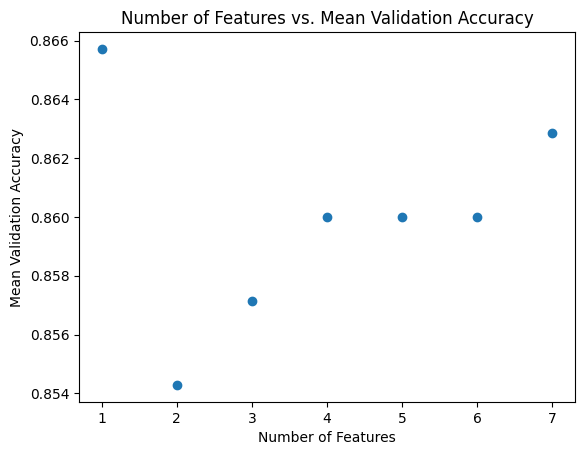

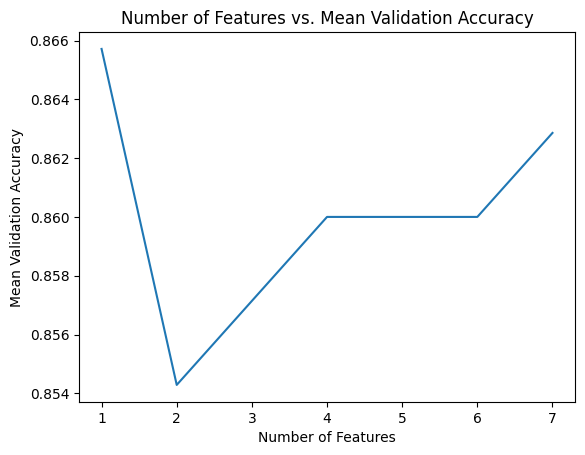

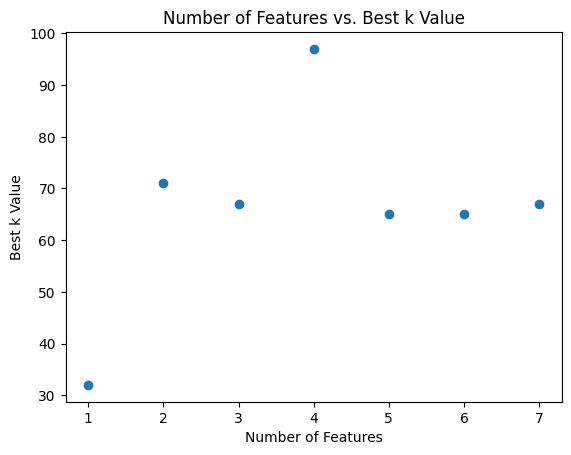

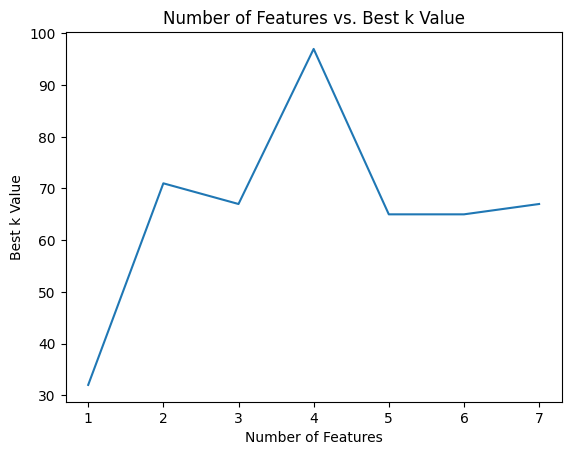

([0.862857142857143,
  0.8600000000000001,
  0.8600000000000001,
  0.86,
  0.8571428571428573,
  0.8542857142857144,
  0.8657142857142857],
 [7, 6, 5, 4, 3, 2, 1])

In [58]:

import sklearn
from sklearn import tree

def Feature_selector (X_train , y_train , tr=0.95): #tr = 0.95 is the threshold for selecting important features.

    all_the_cross_mean_test_accuracy_1 = [] #stores the best mean CV value from all the tests
    all_the_best_k_value_1 = [] #stores the best k value from all the runs
    number_of_features = [] #stores the number of features used at each run.

    while True:

      dt = tree.DecisionTreeClassifier(random_state=98)
      dt.fit(X_train, y_train)
      importance = dt.feature_importances_
      for i,v in enumerate(importance):
        print('Feature: %0d, Score: %.5f:' % (i,v))

      The_best_k_value = [] #temp store the k value at a certain run
      all_the_cross_validation_accuracy = [] # temp hold for all the values of the mean cross validation accuracy into a list
      all_the_cross_mean_train_accuracy = [] # temp hold for all the values for the mean train accuracy list
      number_of_features.append(len(X_train.columns))

      for k in range(1, 101): #for loop that runs from k = 1 to 100.

          knn = neighbors.KNeighborsClassifier(n_neighbors=k)
          scores = cross_validate(knn, X_train, y_train, cv=5, return_train_score=True)

          all_the_cross_validation_accuracy.append(scores['test_score'].mean()) #stores the value of the mean cross validation accuracy in the list and appends it.
          #all_the_cross_mean_train_accuracy.append(scores['train_score'].mean())

          print('Mean Validation Accuracy for k = %d: %.8f' % (k, scores['test_score'].mean())) # returns the mean cross-validation validation score

      print('The max mean cross validation is %.10f and the k = %d:' % (max(all_the_cross_validation_accuracy), all_the_cross_validation_accuracy.index(max(all_the_cross_validation_accuracy)) + 1))#print the best mean CV and associated k value
      The_best_k_value = all_the_cross_validation_accuracy.index(max(all_the_cross_validation_accuracy)) + 1 #Calculate the best k value based on the index of the max accuracy
      print('The best k value is, k = %d:' % The_best_k_value) #prints the best k value
      print('\n')

      all_the_cross_mean_test_accuracy_1.append(max(all_the_cross_validation_accuracy)) #appends the max cross validation of all the runs
      all_the_best_k_value_1.append(The_best_k_value) #appends the K value of all the runs.

      if max(all_the_cross_validation_accuracy) < 0.8628571429 * tr or len(X_train.columns) == 1: #if statement to either break if the mean CV of a certain run is less than the orignal CV * 0.95 OR the column length of X_train is = to 1.
          break

      least_imporant_feature = np.argmin(importance) # gets the index of the least important feature using numpy since it is an array.

      X_train = X_train.drop(X_train.columns[least_imporant_feature], axis = 1) #drops the index of the least important feature and updates the X_train column.

      print(least_imporant_feature) #prints the least important feature
      print(X_train) #prints the updated X_train
      print('\n')


    print(all_the_cross_mean_test_accuracy_1) #prints the final list of the mean CV
    print(all_the_best_k_value_1) #prints the final list of the best k values
    print(number_of_features) #prints the list of the number of features used at each run.

    plt.scatter(number_of_features, all_the_cross_mean_test_accuracy_1) #plots the ranges of k from 1 to 100 on the x-axis and the mean cross validation with respect to each k value on the y-axis for scatter plot.

    plt.xlabel("Number of Features")
    plt.ylabel("Mean Validation Accuracy")
    plt.title("Number of Features vs. Mean Validation Accuracy");

    plt.show()

    plt.plot(number_of_features, all_the_cross_mean_test_accuracy_1) #plots the number of features vs mean test accuracy for regular plot.

    plt.xlabel("Number of Features")
    plt.ylabel("Mean Validation Accuracy")
    plt.title("Number of Features vs. Mean Validation Accuracy");

    plt.show()

    plt.scatter(number_of_features, all_the_best_k_value_1) #plots the number of features vs best k values for scatter plot

    plt.xlabel("Number of Features")
    plt.ylabel("Best k Value")
    plt.title("Number of Features vs. Best k Value");

    plt.show()

    plt.plot(number_of_features, all_the_best_k_value_1) #plots the number of features vs the best k value for regular plot

    plt.xlabel("Number of Features")
    plt.ylabel("Best k Value")
    plt.title("Number of Features vs. Best k Value");
    plt.show()


    return all_the_cross_mean_test_accuracy_1, number_of_features #return the cross mean test and number of features.

Feature_selector(X_train, y_train) #calls up the function




State what is the number of essential features for classification and justify your answer. [1]

Answer:

Based on the best mean validation accuracy vs number of features, the essential number of features is 1 features as that yielded the highest mean validation accuracy which was 0.865714. The other features did not aid in increasing the mean validation accuracy which is why the mean validation accuracy either decrease or did not improve as the number of features decreased. Also, the data is not standardized therefore, not all the features are contributing to the target value equally due to their different magnitudes.

## Part 4: Standardization [1 Marks]

Standardizing the data usually means scaling our data to have a mean of zero and a standard deviation of one.

**Note:** When we standardize a dataset, do we care if the data points are in our training set or test set? Yes! The training set is available for us to train a model - we can use it however we want. The test set, however, represents a subset of data that is not available for us during training. For example, the test set can represent the data that someone who bought our model would use to see how the model performs (which they are not willing to share with us).
Therefore, we cannot compute the mean or standard deviation of the whole dataset to standardize it - we can only calculate the mean and standard deviation of the training set. However, when we sell a model to someone, we can say what our scalers (mean and standard deviation of our training set) was. They can scale their data (test set) with our training set's mean and standard deviation. Of course, there is no guarantee that the test set would have a mean of zero and a standard deviation of one, but it should work fine.

**To summarize: We fit the StandardScaler only on the training set. We transform both training and test sets with that scaler.**

1. Standardize the training  and test data ([Help](https://scikit-learn.org/stable/modules/preprocessing.html))

2. Call your ``Feature_selector`` function on the standardized training data with a threshold of 95\%.
 * Plot the Cross validation accuracy when we have the standardized data (this part) and the original training data (last part) vs. the Number of features in a single plot (to compare them easily).

3. Discuss how standardization (helped/hurt) your model and its performance? Discuss which cases lead to a higher cross validation accuracy (how many features? which features? What K?)


     GRE Score  TOEFL Score  University Rating  SOP  LOR  CGPA  Research
61         307          101                  3  4.0  3.0  8.20         0
12         328          112                  4  4.0  4.5  9.10         1
225        296           99                  2  2.5  2.5  8.03         0
99         323          113                  3  4.0  4.0  8.88         1
160        315          103                  1  1.5  2.0  7.86         0
..         ...          ...                ...  ...  ...   ...       ...
91         299           97                  3  5.0  3.5  7.66         0
447        320          108                  3  3.5  5.0  8.97         1
180        300          104                  3  3.5  3.0  8.16         0
42         313          107                  2  2.5  2.0  8.50         1
474        308          105                  4  3.0  2.5  7.95         1

[350 rows x 7 columns]
            0         1         2         3        4         5         6
0   -0.808167 -0.996884 -0.

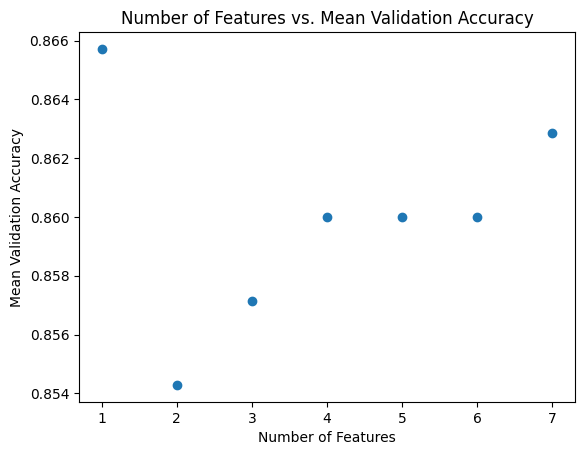

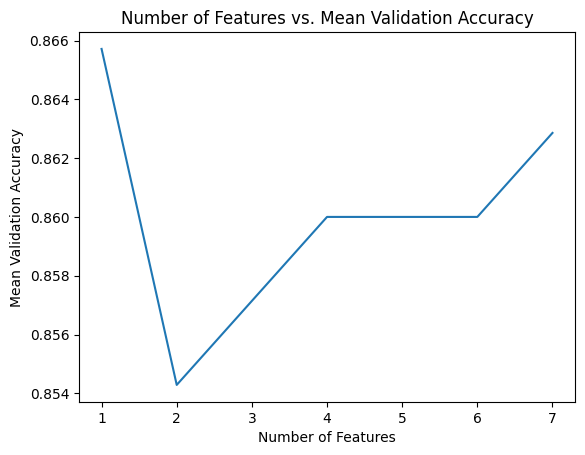

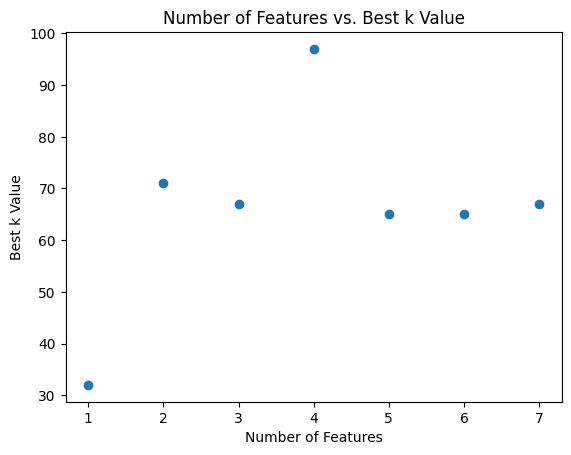

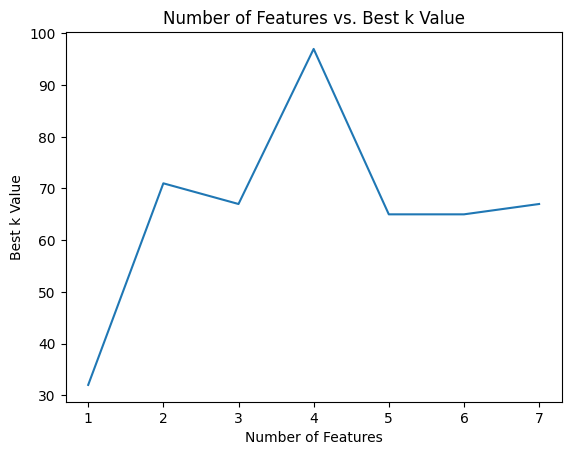

Feature: 0, Score: 0.07829:
Feature: 1, Score: 0.03667:
Feature: 2, Score: 0.02860:
Feature: 3, Score: 0.05943:
Feature: 4, Score: 0.04230:
Feature: 5, Score: 0.71219:
Feature: 6, Score: 0.04250:
Mean Validation Accuracy for k = 1: 0.83428571
Mean Validation Accuracy for k = 2: 0.83714286
Mean Validation Accuracy for k = 3: 0.85428571
Mean Validation Accuracy for k = 4: 0.86857143
Mean Validation Accuracy for k = 5: 0.88000000
Mean Validation Accuracy for k = 6: 0.86285714
Mean Validation Accuracy for k = 7: 0.86857143
Mean Validation Accuracy for k = 8: 0.86285714
Mean Validation Accuracy for k = 9: 0.85428571
Mean Validation Accuracy for k = 10: 0.86285714
Mean Validation Accuracy for k = 11: 0.86571429
Mean Validation Accuracy for k = 12: 0.86000000
Mean Validation Accuracy for k = 13: 0.86000000
Mean Validation Accuracy for k = 14: 0.86571429
Mean Validation Accuracy for k = 15: 0.86285714
Mean Validation Accuracy for k = 16: 0.86857143
Mean Validation Accuracy for k = 17: 0.865714

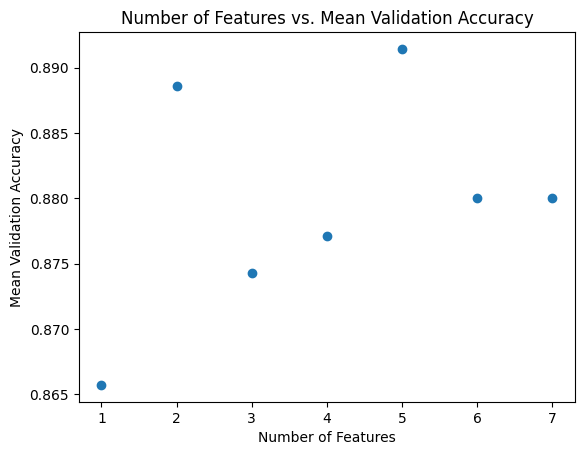

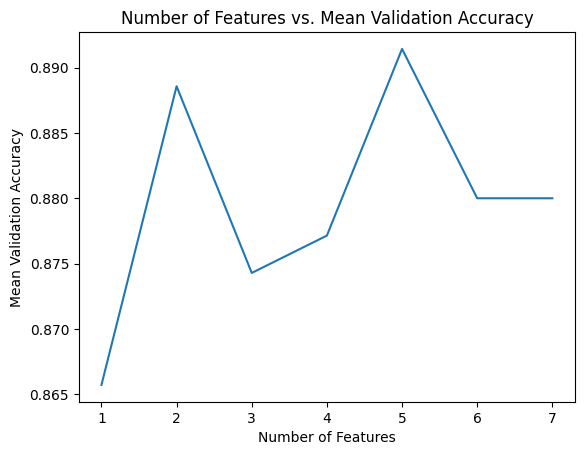

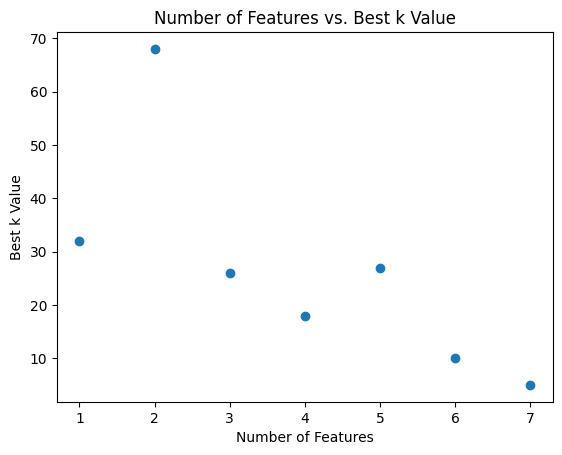

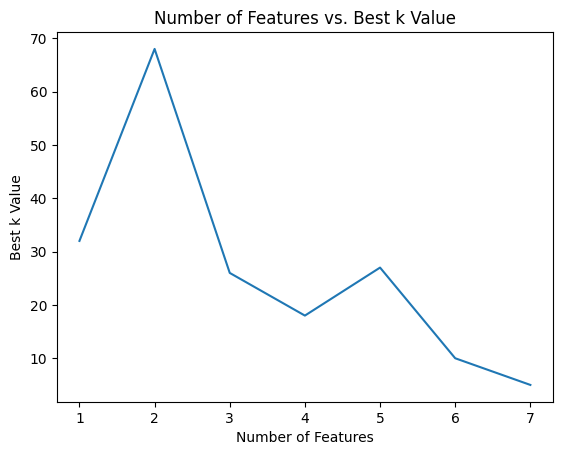

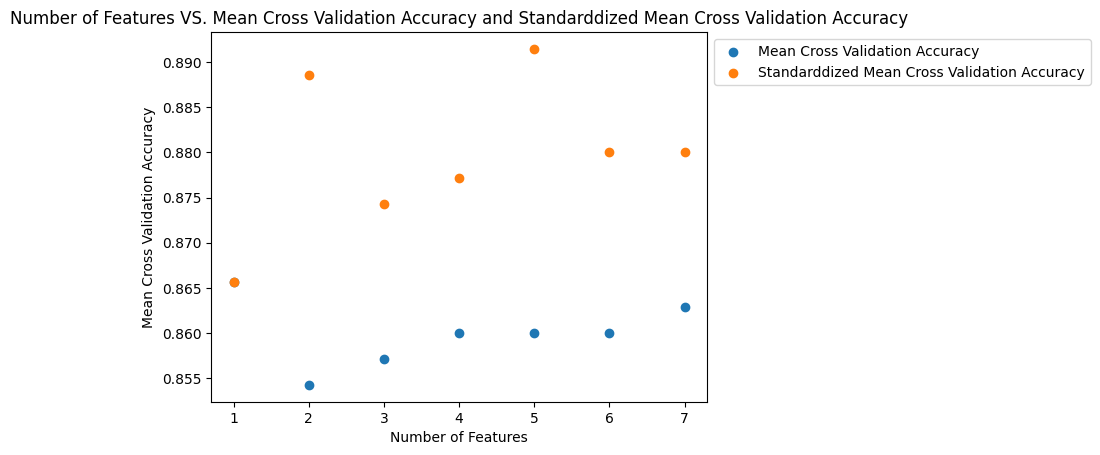

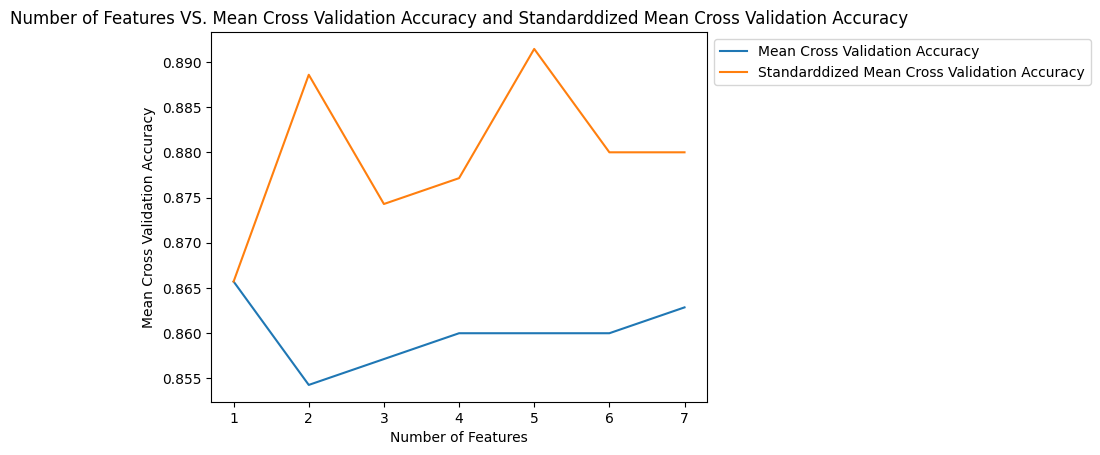

In [59]:
from sklearn import preprocessing
print(X_train)
scaler = preprocessing.StandardScaler().fit(X_train) #scale the X_train
scaler
#StandardScaler()

scaler.mean_ #mean of the scale
scaler.scale_
X_scaled = scaler.transform(X_train) #transform X_train to scaled X_train.
X_scaled = pd.DataFrame(X_scaled) #transform the X_Scaled to a DataFrame
print(X_scaled)
print('\n')
print(X_scaled.mean(axis=0))
print('\n')
print(X_scaled.std(axis=0))

all_the_cross_mean_test_accuracy_1_X_train, number_of_features_X_train = Feature_selector(X_train, y_train, tr=0.95) #Calls upon X_train on the feature selector and saves the result in a seperate list.
all_the_cross_mean_test_accuracy_1_X_scaled, number_of_features_X_scaled = Feature_selector(X_scaled, y_train, tr=0.95) #Calls upon X_scaled in the feature selector and saves the results in a seperate list.


plt.scatter(number_of_features_X_train, all_the_cross_mean_test_accuracy_1_X_train, label = 'Mean Cross Validation Accuracy') #plots the features on the x-axis and the mean cross validation with respect to each k value on the y-axis.
plt.scatter(number_of_features_X_train, all_the_cross_mean_test_accuracy_1_X_scaled, label = 'Standarddized Mean Cross Validation Accuracy') #plots the ranges k from 1 to 100 on the x-axis and the mean training accuracy with respect to each k value on the y-axis.

plt.legend(loc='upper left',bbox_to_anchor=(1, 1))
plt.xlabel("Number of Features")
plt.ylabel("Mean Cross Validation Accuracy")
plt.title("Number of Features VS. Mean Cross Validation Accuracy and Standarddized Mean Cross Validation Accuracy");
plt.show()

print('\n')

plt.plot(number_of_features_X_train, all_the_cross_mean_test_accuracy_1_X_train, label = 'Mean Cross Validation Accuracy') #plots the features on the x-axis and the mean cross validation with respect to each k value on the y-axis.
plt.plot(number_of_features_X_train, all_the_cross_mean_test_accuracy_1_X_scaled, label = 'Standarddized Mean Cross Validation Accuracy')#plots the ranges k from 1 to 100 on the x-axis and the mean training accuracy with respect to each k value on the y-axis.

plt.legend(loc='upper left',bbox_to_anchor=(1, 1))
plt.xlabel("Number of Features")
plt.ylabel("Mean Cross Validation Accuracy")
plt.title("Number of Features VS. Mean Cross Validation Accuracy and Standarddized Mean Cross Validation Accuracy");
plt.show()




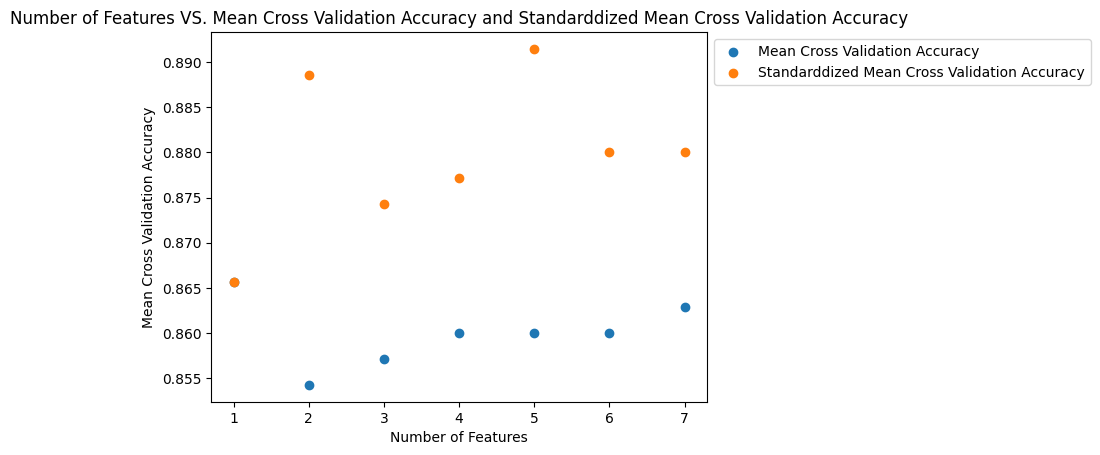

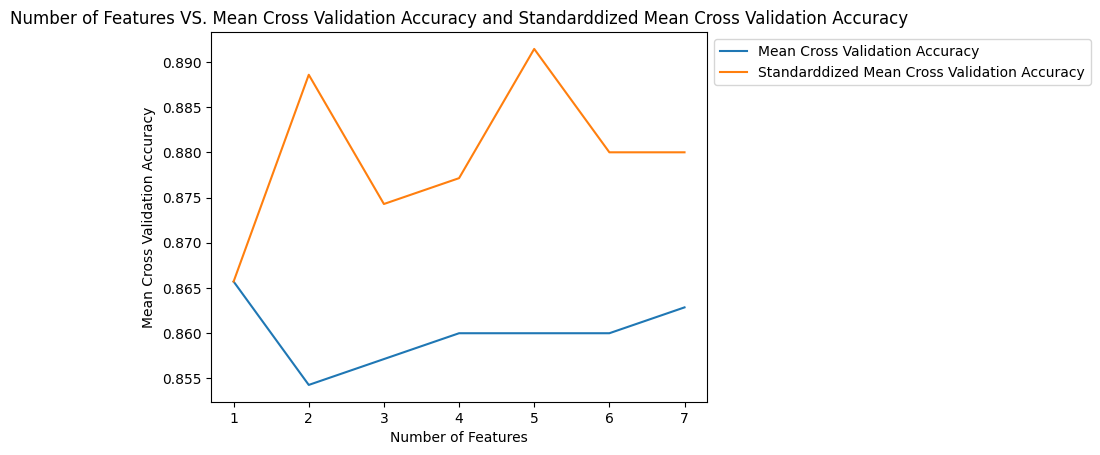

In [60]:
plt.scatter(number_of_features_X_train, all_the_cross_mean_test_accuracy_1_X_train, label = 'Mean Cross Validation Accuracy') #plots the features on the x-axis and the mean cross validation with respect to each k value on the y-axis.
plt.scatter(number_of_features_X_train, all_the_cross_mean_test_accuracy_1_X_scaled, label = 'Standarddized Mean Cross Validation Accuracy') #plots the ranges k from 1 to 100 on the x-axis and the mean training accuracy with respect to each k value on the y-axis.

plt.legend(loc='upper left',bbox_to_anchor=(1, 1))
plt.xlabel("Number of Features")
plt.ylabel("Mean Cross Validation Accuracy")
plt.title("Number of Features VS. Mean Cross Validation Accuracy and Standarddized Mean Cross Validation Accuracy");
plt.show()

print('\n')

plt.plot(number_of_features_X_train, all_the_cross_mean_test_accuracy_1_X_train, label = 'Mean Cross Validation Accuracy') #plots the features on the x-axis and the mean cross validation with respect to each k value on the y-axis.
plt.plot(number_of_features_X_train, all_the_cross_mean_test_accuracy_1_X_scaled, label = 'Standarddized Mean Cross Validation Accuracy')#plots the ranges k from 1 to 100 on the x-axis and the mean training accuracy with respect to each k value on the y-axis.
plt.legend(loc='upper left', bbox_to_anchor=(1, 1))
plt.xlabel("Number of Features")
plt.ylabel("Mean Cross Validation Accuracy")
plt.title("Number of Features VS. Mean Cross Validation Accuracy and Standarddized Mean Cross Validation Accuracy");
plt.show()


Discuss how standardization (helped/hurt) your model and its performance?

Standardization helped the model performance by ensuring all the features are scaled similarly thus reducing features dominating others due to simply being larger. For example, without standardization the highest CV score was 0.86571 with 1 feature (CGPA), however, the magnitudes of all the features varied by a lot. When we standardized the data, all the features were scaled similarly which resulted in a overall higher CV score for each number of feature. This is due to how the KNN model operates by looking at the distance between points which will be heavily impacted by features with larger scales. By standardization the lowest CV score was 0.86571 with 1 feature which is equal to the highest unstandardized data CV score. The highest CV score for standardized data was 0.8914 with 5 features. This clearly shows how standardizing your data is important and in turn helped the model because, without standardization at 5 features, the CV score was 0.8600.

Discuss which cases lead to a higher cross validation accuracy (how many features? which features? What K?)

Overall, all the cases lead to a higher CV score which lead to a different K value except for when there was 1 feature left. At 1 feature, both the standardize and unstandardized lead to the same CV score and K number because regardless of if the data was standardized or not, when there is 1 feature left it will not affect the CV and k value. Standardization will only affect the CV and in-turn affect the k value if there is more than 1 feature.

Please see below a summary of the number of features and the corresponding feature name, CV and k value for unstandardized and CV and k value for standardized data.

---
7 - Features:

Feature names: GRE Score, TOEFL Score, University Rating, SOP, LOR, CGPA, Research
unstandardized

CV = [0.862857142857143]

K = 67

standardized

CV = [0.8800000000000001]

K = 5

----
6 - Features:

Feature names: GRE Score  TOEFL Score  SOP  LOR  CGPA  Research

unstandardized

CV = [0.8600000000000001]

K=65

standardized

CV= [0.8800000000000001]

K=10

---
5 - Features:

Feature names: GRE Score  TOEFL Score  SOP  LOR  CGPA

unstandardized

CV = [0.8600000000000001]

K= 65

standardized

CV = [0.8914285714285715]

K = 27

---
4 - Features:

Feature names: GRE Score  TOEFL Score  LOR  CGPA

unstandardized

CV = [0.86]

K=97

standardized

CV = [0.8771428571428572]

K = 18

---
3-Features:

Feature names: GRE Score  TOEFL Score  CGPA

unstandardized

CV = [0.8571428571428573]

K = 67

standardized

CV = [0.8742857142857143]

K=26

---
2 - Features

Feature names:GRE Score  CGPA

unstandardized

CV = [0.8542857142857144]

K=71

standardized

CV = [0.8885714285714286]

K = 68

---
1 - Feature

Feature names: CGPA

unstandardized

CV = [0.8657142857142857]

K=32

standardized

CV = [0.8657142857142857]

K = 21

---


## Part 5: Decision Tree Classifier [1 Mark]

Train a decision tree classifier on the standardized dataset (read the [documentation](https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html) and check the example there.) Tune the `max_depth` and `min_samples_split` parameters of the tree using cross-validation (CV).
 * Compare the decision tree's performance (mean CV score) with KNN, both using all the features.


In [61]:
X_test_scaled = scaler.transform(X_test)#scale test scaled

all_the_cross_validation_accuracy = []#saves the best mean CV from all the runs
all_the_cross_mean_train_accuracy = [] #saves the best mean train accuracy from all the runs
all_the_max_depth = [] #saves the best max depth from all the runs based on highest CV score
all_the_min_samples_split = [] #saves the best min sample split from all the runs based on highest CV score

for max_depth in range(4,50): #for loop for max depth between a range of 4 to 50

  for min_samples_split in range(4,50): #for loop for min sample split between a range of 4 to 50

    dt = tree.DecisionTreeClassifier(max_depth=max_depth, min_samples_split=min_samples_split, random_state=98) #decision tree classifier for tuning max depth and min sample split

    scores = cross_validate(dt, X_scaled, y_train, cv=5, return_train_score=True)


    all_the_cross_validation_accuracy.append(scores['test_score'].mean()) #stores the value of the mean cross validation accuracy in the list and appends it.
    all_the_cross_mean_train_accuracy.append(scores['train_score'].mean())
    all_the_max_depth.append(max_depth) #appends the max depth for all runs
    all_the_min_samples_split.append(min_samples_split) #appends the min sample split from all runs

    print('Mean Validation Accuracy - Test score = %.8f' % scores['test_score'].mean()) # returns the mean cross-validation validation score
    #print('Mean Validation Accuracy - Train score = %.8f' % scores['train_score'].mean()) # returns the mean cross-validation validation score
    print('The max depth is = %d' % max_depth)
    print('The min samples split is = %d' % min_samples_split)
    print('\n\n')



all_the_cross_validation_accuracy_1 = max(all_the_cross_validation_accuracy) #gets the max mean CV from all run
all_the_max_depth_1 = all_the_max_depth[all_the_cross_validation_accuracy.index(max(all_the_cross_validation_accuracy))] #gets the max depth associated with the max CV score

all_the_min_samples_split_1 = all_the_min_samples_split[all_the_cross_validation_accuracy.index(max(all_the_cross_validation_accuracy))] #gets the min sample split associated with the max CV score

print('The best test cross validation accuracy is = %.8f' % all_the_cross_validation_accuracy_1) #print the max CV score

print('The best Max depth is = %d' % all_the_max_depth_1) #print the max depth
print('The best minimum sample split is = %d' % all_the_min_samples_split_1) #print the min sample split


Streaming output truncated to the last 5000 lines.
The max depth is = 31
The min samples split is = 45



Mean Validation Accuracy - Test score = 0.85142857
The max depth is = 31
The min samples split is = 46



Mean Validation Accuracy - Test score = 0.85142857
The max depth is = 31
The min samples split is = 47



Mean Validation Accuracy - Test score = 0.85142857
The max depth is = 31
The min samples split is = 48



Mean Validation Accuracy - Test score = 0.85142857
The max depth is = 31
The min samples split is = 49



Mean Validation Accuracy - Test score = 0.82571429
The max depth is = 32
The min samples split is = 4



Mean Validation Accuracy - Test score = 0.82000000
The max depth is = 32
The min samples split is = 5



Mean Validation Accuracy - Test score = 0.81428571
The max depth is = 32
The min samples split is = 6



Mean Validation Accuracy - Test score = 0.80285714
The max depth is = 32
The min samples split is = 7



Mean Validation Accuracy - Test score = 0.80571429

Compare the decision tree's performance (mean CV score) with KNN, both using all the features.

Based on the decision tree performance the best mean CV score was 0.86857143 compared to the KNN with all features which was 0.89142857. Therefore, the KNN performed better. The CV score for KNN is higher because the dataset is small with only having 7 features and 350 rows of data compared to a decision tree model where it would typically perform better with larger datasets.  KNN typically performs better on smaller datasets because it handles them more efficiently. Also, since both the decision tree and KNN were tuned, this means that the data characteristic work better with a KNN model in terms of more clear patterns/clusters in the data.

## Part 6: Test Data [0.5 Mark]

Now that you've created several models, pick your best one (highest CV accuracy) and apply it to the test dataset you had initially set aside. Discuss your results.

In [62]:
from sklearn.metrics import accuracy_score
print(X_train)
print(X_scaled)
X_scaled_Final = np.delete(X_scaled, [2,6], axis = 1) #drop the 2 columns that were associated with the best mean CV score for the standardized KNN

X_test_scaled_Final = np.delete(X_test_scaled, [2,6], axis = 1) #drops the same 2 columns for the X_test so both X_scaled and X_test have the same dimensions.


knn_Final = neighbors.KNeighborsClassifier(n_neighbors=27) #insert the best K value associated with the best mean CV score for the standardized KNN
knn_Final.fit(X_scaled_Final, y_train) #fit the data
accuracy = accuracy_score(y_test, knn_Final.predict(X_test_scaled_Final))
print ("Test set accuracy: ", accuracy * 100, "%") #print the accuracy on the test data


     GRE Score  TOEFL Score  University Rating  SOP  LOR  CGPA  Research
61         307          101                  3  4.0  3.0  8.20         0
12         328          112                  4  4.0  4.5  9.10         1
225        296           99                  2  2.5  2.5  8.03         0
99         323          113                  3  4.0  4.0  8.88         1
160        315          103                  1  1.5  2.0  7.86         0
..         ...          ...                ...  ...  ...   ...       ...
91         299           97                  3  5.0  3.5  7.66         0
447        320          108                  3  3.5  5.0  8.97         1
180        300          104                  3  3.5  3.0  8.16         0
42         313          107                  2  2.5  2.0  8.50         1
474        308          105                  4  3.0  2.5  7.95         1

[350 rows x 7 columns]
            0         1         2         3        4         5         6
0   -0.808167 -0.996884 -0.

The test accuracy based on the standardized KNN method which had the 5 of 7 features and a k of 27 resulted in an 86.67% accuracy. The mean cross validation accuracy for the training test result was 89.14% which is higher than the test accuracy. This could be due to several factors such as not reducing overfitting further. Although the purpose of feature selection is to reduce the number of features therefore simplifying the data by focusing on the most relevant features (dimensionality reduction), there could be excess noise or idiosyncrasies in the training data that were not removed through feature selection.

Additionally, shuffling the data was never done on the dataset. Therefore, this could lead to the training set having patterns or biases rather than the model learning the generalized patterns. Also, not shuffling the data could lead to the test set having samples that are not seen during the training.
